# Hemp Disease Classification and Detection using MULTINOMIAL LOGISTIC REGRESSION

## Import Libraries

In [4]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import random
import gc
from tqdm import tqdm
from keras.preprocessing import image

Using TensorFlow backend.


In [5]:
hemp = pd.read_csv('Hemp_Train2.csv',low_memory=False)
hemp.head()

,id,label
0,Grey_Mold282.jpg,Grey Mold
1,Grey_Mold283.jpg,Grey Mold
2,Grey_Mold284.jpg,Grey Mold
3,Grey_Mold285.jpg,Grey Mold
4,Grey_Mold286.jpg,Grey Mold


In [6]:
hemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 2 columns):
id       2499 non-null object
label    2499 non-null object
dtypes: object(2)
memory usage: 39.1+ KB


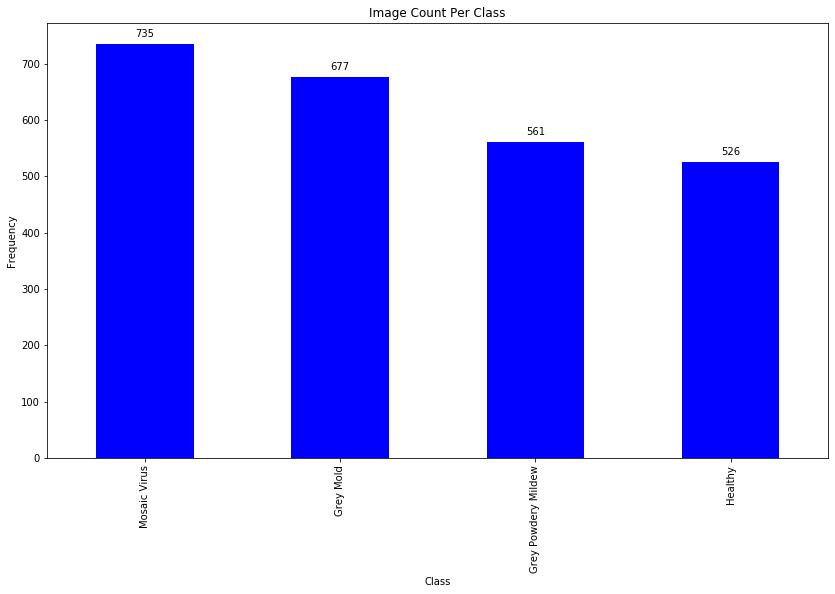

In [7]:
hemp_bar = hemp['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Image Count Per Class", color='blue')
hemp_bar.set_xlabel("Class")
hemp_bar.set_ylabel("Frequency")

for p in hemp_bar.patches:
    hemp_bar.annotate( p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

## Preprocessing Images

In [8]:
train_image = []
for i in tqdm(range(hemp.shape[0])):
    img = image.load_img(hemp['id'][i],target_size=(100,100,3), color_mode = "rgb")
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|█████████████████████████████████████████████████████████████████████████████| 2499/2499 [00:24<00:00, 102.24it/s]


'Grey Mold'

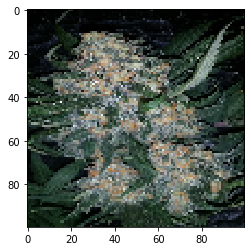

In [9]:
plt.imshow(X[50])
hemp['label'][50]

## Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},

logistic_regression=LogisticRegression(random_state=42)

log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)

log_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=({'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Logistic Regression Algorithm

In [10]:
#reshape
X_2d = X.reshape(X.shape[0],-1)

In [11]:
y = np.array(hemp['label'])
y.reshape(-1,1)

array([['Grey Mold'],
       ['Grey Mold'],
       ['Grey Mold'],
       ...,
       ['Grey Mold'],
       ['Grey Mold'],
       ['Grey Mold']], dtype=object)

In [44]:
#Splitting the data
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_2d,y,test_size=0.30,random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
mul_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False).fit(X_train ,y_train)

y_pred=mul_lr.predict(X_test)

## Results

In [26]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[181,  13,   3,   8],
       [ 16,  94,  26,  30],
       [ 11,  25,  80,  45],
       [ 14,  10,  29, 165]], dtype=int64)

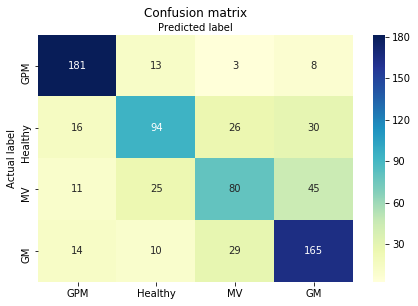

In [28]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names= ['GPM','Healthy','MV','GM'] # name  of classes
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [29]:
print(metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

          Grey Mold       0.82      0.88      0.85       205
Grey Powdery Mildew       0.66      0.57      0.61       166
            Healthy       0.58      0.50      0.54       161
       Mosaic Virus       0.67      0.76      0.71       218

        avg / total       0.69      0.69      0.69       750



In [30]:
print("Multinomial Logistic regression Test Accuracy :", 
     metrics.accuracy_score(y_test, mul_lr.predict(X_test_std)) *100)

Multinomial Logistic regression Test Accuracy : 70.66666666666667


## Validation Accuracy

In [32]:
from sklearn import metrics, cross_validation
logreg=LogisticRegression()

# cross validation prediction
predicted = cross_validation.cross_val_predict(logreg, X_train, y_train, cv=10)
print(metrics.accuracy_score(y_train, predicted)) 

0.6878216123499142


## ROC AUC Score

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [33]:
multiclass_roc_auc_score(y_test,y_pred)

0.7863823588450468

## Display Classified and Misclassified Images with Predicted Labels

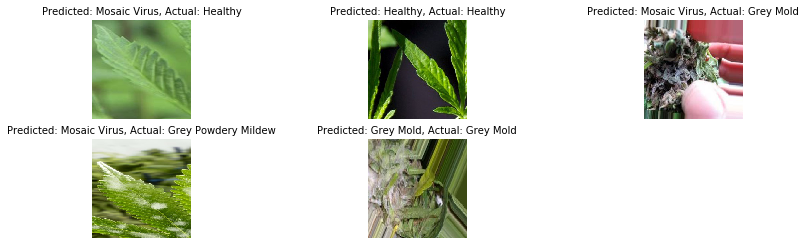

In [109]:
import numpy as np 
import matplotlib.pyplot as plt

index = 0
classifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        classifiedIndexes.append(index)
        index +=1

plt.figure(figsize=(14,4))
for plotIndex, badIndex in enumerate(classifiedIndexes[6:11]):
    plt.subplot(2,3, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (100,100,3)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 10)
    plt.axis('off')
   